In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
netflix_df = pd.read_csv('netflix_titles.csv')

In [4]:
print("Shape: ",netflix_df.shape)
print("No of rows: ", netflix_df.shape[0])
print("No of columns: ", netflix_df.shape[1])

Shape:  (8807, 12)
No of rows:  8807
No of columns:  12


In [5]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [12]:
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Part 2: Add New Columns 
## Create:
- content_age = current_year - release_year
- is_recent (released ≥ 2018)

In [21]:
from datetime import datetime 
current_year = datetime.now().year

netflix_df["content_age"]= current_year - netflix_df["release_year"]

netflix_df[["title","type","release_year","content_age"]].head()

,title,type,release_year,content_age
0,Dick Johnson Is Dead,Movie,2020,6
1,Blood & Water,TV Show,2021,5
2,Ganglands,TV Show,2021,5
3,Jailbirds New Orleans,TV Show,2021,5
4,Kota Factory,TV Show,2021,5


In [28]:
netflix_df["is_recent"] = netflix_df["release_year"] >= 2018
netflix_df[["title","type", "release_year", "content_age","is_recent"]].head(9)

,title,type,release_year,content_age,is_recent
0,Dick Johnson Is Dead,Movie,2020,6,True
1,Blood & Water,TV Show,2021,5,True
2,Ganglands,TV Show,2021,5,True
3,Jailbirds New Orleans,TV Show,2021,5,True
4,Kota Factory,TV Show,2021,5,True
5,Midnight Mass,TV Show,2021,5,True
6,My Little Pony: A New Generation,Movie,2021,5,True
7,Sankofa,Movie,1993,33,False
8,The Great British Baking Show,TV Show,2021,5,True


# Part 3: 
## Counting and proportions

In [35]:
count_by_type = netflix_df["type"].value_counts()
print("Type count by type: ", count_by_type)

print("\n\nProportion: ")
print(count_by_type/sum(count_by_type))

Type count by type:  type
Movie      6131
TV Show    2676
Name: count, dtype: int64


Proportion: 
type
Movie      0.696151
TV Show    0.303849
Name: count, dtype: float64


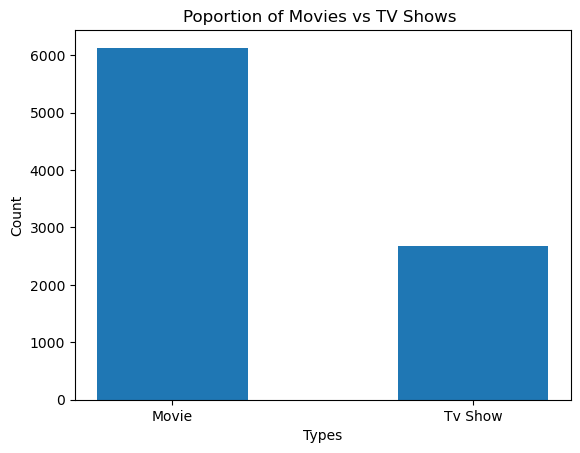

In [51]:
plt.bar(["Movie","Tv Show"], height=count_by_type, width=0.5)
plt.title("Poportion of Movies vs TV Shows ")
plt.xlabel("Types")
plt.ylabel("Count")
plt.show()